In [89]:
import pandas as pd
import numpy as np
import timeit
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.graph_objs as go
%matplotlib inline

from keras.datasets import boston_housing

In [4]:
pd.DataFrame(boston_housing.load_data())

,0,1
0,"[[1.23247, 0.0, 8.14, 0.0, 0.538, 6.142, 91.7,...","[15.2, 42.3, 50.0, 21.1, 17.7, 18.5, 11.3, 15...."
1,"[[18.0846, 0.0, 18.1, 0.0, 0.679, 6.434, 100.0...","[7.2, 18.8, 19.0, 27.0, 22.2, 24.5, 31.2, 22.9..."


In [5]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [6]:
x_train.shape, y_train.shape

((404, 13), (404,))

In [7]:
x_test.shape, y_test.shape

((102, 13), (102,))

In [8]:
len(x_train), len(x_test)

(404, 102)

In [9]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
400,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59
401,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
402,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79


In [10]:
pd.DataFrame(y_train)

,0
0,15.2
1,42.3
2,50.0
3,21.1
4,17.7
...,...
399,19.4
400,25.2
401,19.4
402,19.4


In [11]:
pd.set_option('display.max_columns', 100)

In [12]:
col_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [23]:
train_data = np.concatenate([x_train, y_train[:, np.newaxis]], axis=1)
#train_data = pd.concat( [pd.DataFrame(x_train), pd.DataFrame(y_train)], axis=1, ignore_index=True).values
test_data = np.concatenate([x_test, y_test[:, np.newaxis]], axis=1)

In [58]:
df_train = pd.DataFrame(train_data, columns=col_name)
df_test = pd.DataFrame(test_data, columns=col_name)

In [59]:
df_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20,19.4
400,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59,25.2
401,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,19.4
402,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79,19.4


In [61]:
percentages = ['CRIM', 'ZN', 'INDUS', 'AGE', 'PTRATIO', 'LSTAT']

In [62]:
#normalizing data
for col in percentages:
    df_train[col] /=100
    df_test[col] /=100
    
df_train['B'] /=1000
df_train['TAX']/=10000
df_test['B'] /=1000
df_test['TAX']/=10000

In [73]:
x_train, y_train = df_train.values[:, :13], df_train.values[:, 13]
x_test, y_test = df_test.values[:, :13], df_test.values[:, 13]

In [79]:
df_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.037451,0.114802,0.111044,0.061881,0.557356,6.267082,0.690106,3.740271,9.440594,0.040590,0.184760,0.354783,0.127408,22.395050
std,0.092407,0.237677,0.068113,0.241238,0.117293,0.709788,0.279407,2.030215,8.698360,0.016637,0.022004,0.094111,0.072545,9.210442
min,0.000063,0.000000,0.004600,0.000000,0.385000,3.561000,0.029000,1.129600,1.000000,0.018800,0.126000,0.000320,0.017300,5.000000
25%,0.000814,0.000000,0.051300,0.000000,0.453000,5.874750,0.454750,2.077100,4.000000,0.027900,0.172250,0.374673,0.068900,16.675000
50%,0.002689,0.000000,0.096900,0.000000,0.538000,6.198500,0.785000,3.142300,5.000000,0.033000,0.191000,0.391250,0.113950,20.750000
75%,0.036748,0.125000,0.181000,0.000000,0.631000,6.609000,0.941000,5.118000,24.000000,0.066600,0.202000,0.396157,0.170925,24.800000
max,0.889762,1.000000,0.277400,1.000000,0.871000,8.725000,1.000000,10.710300,24.000000,0.071100,0.220000,0.396900,0.379700,50.000000


In [83]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.012325,0.000,0.0814,0.0,0.5380,6.142,0.917,3.9769,4.0,0.0307,0.210,0.39690,0.1872
1,0.000218,0.825,0.0203,0.0,0.4150,7.610,0.157,6.2700,2.0,0.0348,0.147,0.39538,0.0311
2,0.048982,0.000,0.1810,0.0,0.6310,4.970,1.000,1.3325,24.0,0.0666,0.202,0.37552,0.0326
3,0.000396,0.000,0.0519,0.0,0.5150,6.037,0.345,5.9853,5.0,0.0224,0.202,0.39690,0.0801
4,0.036931,0.000,0.1810,0.0,0.7130,6.376,0.884,2.5671,24.0,0.0666,0.202,0.39143,0.1465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.002198,0.000,0.0691,0.0,0.4480,5.602,0.620,6.0877,3.0,0.0233,0.179,0.39690,0.1620
400,0.001621,0.200,0.0696,0.0,0.4640,6.240,0.163,4.4290,3.0,0.0223,0.186,0.39690,0.0659
401,0.000347,0.350,0.0606,0.0,0.4379,6.031,0.233,6.6407,1.0,0.0304,0.169,0.36225,0.0783
402,0.021492,0.000,0.1958,0.0,0.8710,5.709,0.985,1.6232,5.0,0.0403,0.147,0.26195,0.1579


print(np.max(x_train, axis=1))

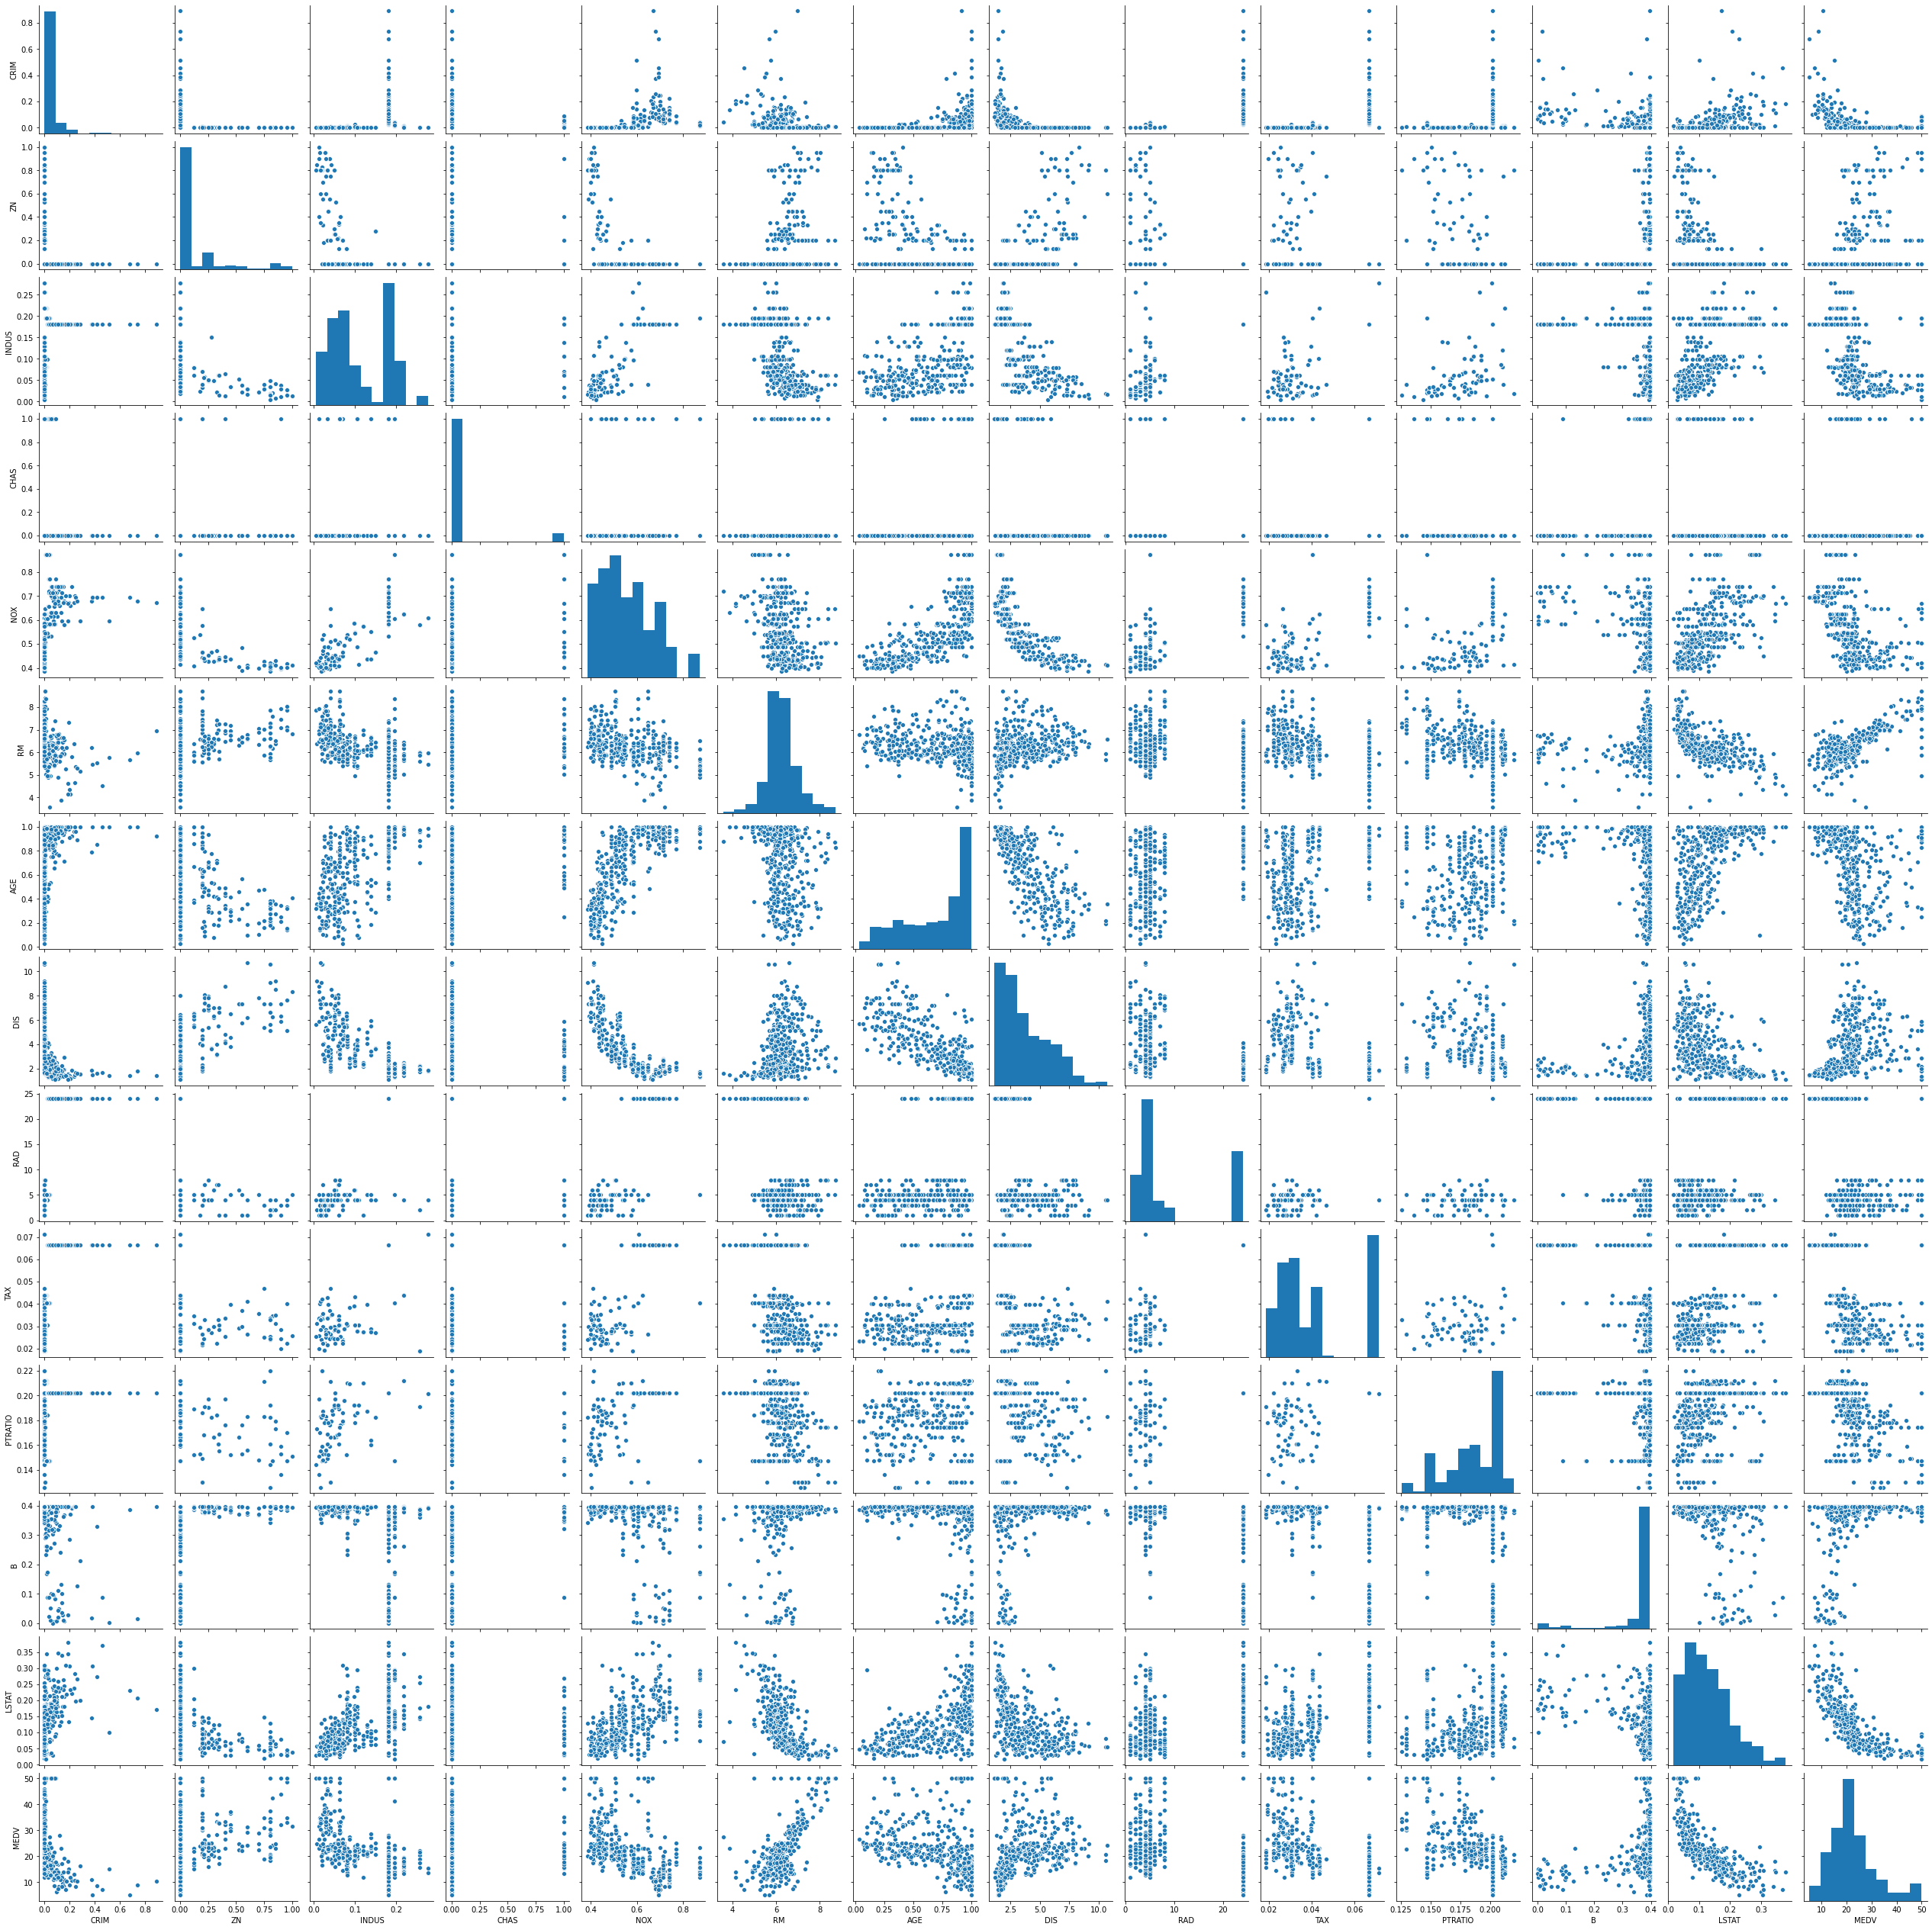

In [90]:
sns.pairplot(df_train)

In [91]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(16, activation='sigmoid', input_shape=(13,)))
model.add(Dense(1, activation='linear'))

In [92]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                224       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [93]:
model.compile(optimizer='sgd', loss='mse', metrics=['mape']) 
#sgd - stochastic gradient descent
#mse - mean square error
#mape - mean absolute percentage error

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=.2)

In [96]:
history = model.fit(x_train, y_train, batch_size=4, epochs=10, validation_data=(x_valid, y_valid))

Train on 323 samples, validate on 81 samples
Epoch 1/10
323/323 [==============================] - 0s 1ms/step - loss: 105.4723 - mape: 32.5455 - val_loss: 70.2027 - val_mape: 39.3562
Epoch 2/10
323/323 [==============================] - 0s 346us/step - loss: 76.8729 - mape: 31.0402 - val_loss: 62.8837 - val_mape: 31.7624
Epoch 3/10
323/323 [==============================] - 0s 349us/step - loss: 76.0745 - mape: 29.9719 - val_loss: 64.0020 - val_mape: 33.4786
Epoch 4/10
323/323 [==============================] - 0s 337us/step - loss: 76.4958 - mape: 30.7341 - val_loss: 63.6641 - val_mape: 30.9174
Epoch 5/10
323/323 [==============================] - 0s 338us/step - loss: 76.5529 - mape: 30.6672 - val_loss: 62.4234 - val_mape: 28.0433
Epoch 6/10
323/323 [==============================] - 0s 326us/step - loss: 73.2199 - mape: 29.5382 - val_loss: 66.4224 - val_mape: 26.6723
Epoch 7/10
323/323 [==============================] - 0s 316us/step - loss: 76.7785 - mape: 29.5177 - val_loss: 64.2

In [97]:
x_train.shape

(323, 13)

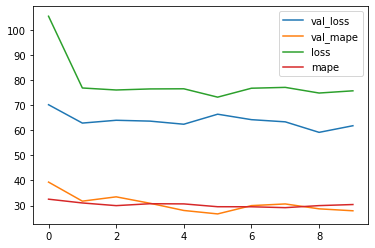

In [98]:
for name, value in history.history.items():
    plt.plot(value, label=name)
plt.legend()
plt.show()

## evaluate model

In [99]:
results = model.evaluate(x_test, y_test)

102/102 [==============================] - 0s 67us/step


In [100]:
print('Loss: {:.6f} - MAPE: {:.6f}'.format(*results))

Loss: 67.451238 - MAPE: 31.640015


## list predicted value

In [101]:
test_pred = model.predict(x_test)

In [102]:
test_pred = np.squeeze(test_pred)

In [103]:
test_pred

array([15.431893, 23.051502, 23.960194, 24.517239, 24.239407, 23.305359,
       24.023243, 24.037907, 24.671188, 15.15249 , 24.324272, 24.082432,
       24.604855, 24.681026, 15.321846, 22.130524, 24.073895, 24.00732 ,
       14.974235, 15.251187, 15.201873, 15.399175, 24.038593, 21.01463 ,
       24.002129, 15.0305  , 22.826569, 23.30729 , 15.390392, 23.953083,
       23.643452, 15.420294, 24.1969  , 24.060837, 15.131364, 15.336362,
       23.22791 , 24.030697, 24.476055, 23.985935, 23.999557, 24.398525,
       15.258042, 23.729858, 24.499908, 24.33234 , 23.566902, 24.074368,
       15.168964, 24.190079, 23.99142 , 23.904476, 15.253112, 24.035076,
       24.213654, 24.177284, 15.476154, 25.023346, 24.349213, 24.100456,
       15.338064, 15.450371, 15.579784, 23.347683, 24.070587, 24.004173,
       15.312538, 23.448013, 23.784973, 15.430695, 15.328481, 23.244514,
       15.061504, 24.108234, 23.61493 , 23.741333, 23.94614 , 24.227428,
       24.096996, 15.277015, 20.193935, 24.880402, 

## compare predicted value to true value

In [104]:
for pred, true in zip(test_pred, y_test):
    print('Pred: {:.6f} - True: {:.6f}'.format(pred,true))

Pred: 15.431893 - True: 7.200000
Pred: 23.051502 - True: 18.800000
Pred: 23.960194 - True: 19.000000
Pred: 24.517239 - True: 27.000000
Pred: 24.239407 - True: 22.200000
Pred: 23.305359 - True: 24.500000
Pred: 24.023243 - True: 31.200000
Pred: 24.037907 - True: 22.900000
Pred: 24.671188 - True: 20.500000
Pred: 15.152490 - True: 23.200000
Pred: 24.324272 - True: 18.600000
Pred: 24.082432 - True: 14.500000
Pred: 24.604855 - True: 17.800000
Pred: 24.681026 - True: 50.000000
Pred: 15.321846 - True: 20.800000
Pred: 22.130524 - True: 24.300000
Pred: 24.073895 - True: 24.200000
Pred: 24.007320 - True: 19.800000
Pred: 14.974235 - True: 19.100000
Pred: 15.251187 - True: 22.700000
Pred: 15.201873 - True: 12.000000
Pred: 15.399175 - True: 10.200000
Pred: 24.038593 - True: 20.000000
Pred: 21.014629 - True: 18.500000
Pred: 24.002129 - True: 20.900000
Pred: 15.030500 - True: 23.000000
Pred: 22.826569 - True: 27.500000
Pred: 23.307289 - True: 30.100000
Pred: 15.390392 - True: 9.500000
Pred: 23.953083 

## Save model

In [105]:
model_path = 'model.h5'
model.save(model_path)

In [106]:
from keras.models import load_model

In [107]:
loaded_model = load_model(model_path)

In [108]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                224       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


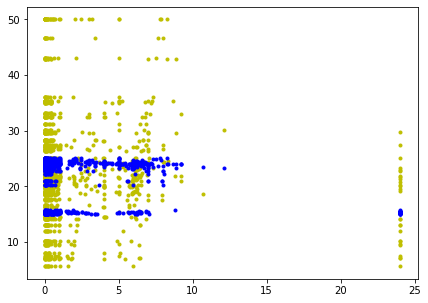

In [113]:
plt.figure(figsize=(7, 5))
plt.plot(x_test, y_test, '.y', x_test, test_pred, '.b')
plt.show()

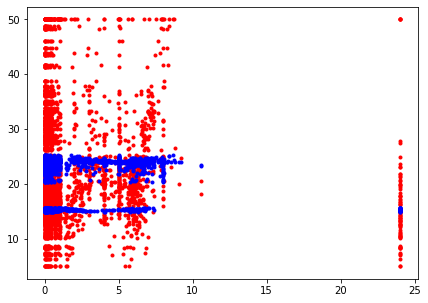

In [114]:
train_pred = model.predict(x_train)
train_pred = np.squeeze(train_pred)

plt.figure(figsize=(7, 5))
plt.plot(x_train, y_train, '.r', x_train, train_pred, '.b')
plt.show()